In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Índice de marginalización en México

Este trabajo de datos esta hecho a partir de los datos de Consejo Nacional de Población, liberados el 04 de Octubre del 2021. Enfocandose en la **Base de datos por municipio 2020**, usando la tabla **IMM_2020**.

La tabla es una hoja de excel de nombre **IMM_2020** que exporté a un .*cvs*. El *encoding* fue con "latin-1" para poder leer los simbolos con acentuación y ñ, que en *.csv* son sustiuidos por el simbolo �.

In [119]:
IMM_2020 = pd.read_csv('IMM_2020.csv', encoding='latin-1')
IMM_2020

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,32,Zacatecas,32054,Villa Hidalgo,19446,7.497894,36.678176,3.010808,0.452908,2.254246,1.137416,21.932484,100.000000,90.877128,55.044146,Bajo,0.861915
2465,32,Zacatecas,32055,Villanueva,31558,4.199744,44.806459,2.536486,0.551254,1.073864,0.895418,15.269627,56.774827,81.912592,56.747058,Muy bajo,0.888580
2466,32,Zacatecas,32056,Zacatecas,149607,1.442438,19.436229,0.294739,0.163292,1.278559,0.484463,9.340958,7.461549,57.885307,60.176191,Muy bajo,0.942275
2467,32,Zacatecas,32057,Trancoso,20455,5.119108,31.992586,3.066130,0.500392,2.860086,1.344192,23.544577,16.788071,83.056133,56.958073,Muy bajo,0.891884


Antes de cintinuar, verificaré la integridad de los datos.

In [120]:
null_count = IMM_2020.isnull().sum()
columns_miss_data = null_count[null_count > 0]

if columns_miss_data.empty:
    print('Ninguna columna tiene datos nulos')
else:
    print('Las columas',''.join(columns_miss_data),'tienen datos nulos')


Ninguna columna tiene datos nulos


Se prosigue a obtener un analisis general de los datos.

Para esto es importante saber que significa cada abreviación.
| Variable | Descripción |
|---|---|
| CVE_ENT | Clave de entidad federativa |
| NOM_ENT | Nombre de entidad federativa |
| CVE_MUN | Clave del municipio |
| NOM_MUN | Nombre del municipio |
| POB_TOT | Población total |
| ANALF | Porcentaje de población analfabeta de 15 años o más |
| SBASC | Porcentaje de población de 15 años o más sin educación básica |
| OVSDE | Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado |
| OVSEE | Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica |
| OVSAE | Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada |
| OVPT | Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra |
| VHAC | Porcentaje de viviendas particulares con hacinamiento |
| PL.5000 | Porcentaje de población que vive en localidades menores a 5 000 habitantes |
| PO2SM | Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos |
| IM_2020 | Índice de marginación, 2020 |
| GM_2020 | Grado de marginación, 2020 |
| IMN_2020 | Índice de marginación normalizado, 2020 |



In [121]:
cuantitive = ['POB_TOT','ANALF','SBASC','OVSDE','OVSEE','OVSAE','OVPT','VHAC','IM_2020','IMN_2020']

IMM_2020[cuantitive].describe()

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,IM_2020,IMN_2020
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,53.955581,0.844869
std,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,3.904590,0.061140
min,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,21.406635,0.335198
25%,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,51.844432,0.811812
50%,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,54.423506,0.852196
75%,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,56.696126,0.887782
max,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,62.397145,0.977052


Lo que más llama la atencion de esta tabla, son los datos extremos, especialmente los datos máximos. Por ejemplo, existe una comunidad donde casi el 90% de su población mayor de 15 años no tiene el nivel de basica. Existe otra comunidad con el 81.79% de su problación sin acceso al agua embotellada. En general dos datos máximos estan increiblemente alejados de la media. Llama mucho la atención sobre el hecho de como el cuartil 75%, sea un valor tan pequeño en comparación del valor máximo en valores como la falta de acceso a la educacion, el drenaje, la energía electrica, etc., considero que es importante enfocarse en como son estas metricas de los valores mayores a este cuartil.

In [122]:
Marginacion_Estados = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='CVE_MUN', aggfunc='count')
marginacion_orden = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
Marginacion_Estados = Marginacion_Estados[marginacion_orden]
Marginacion_Estados['Total Municipios'] = Marginacion_Estados.sum(axis=1)
Marginacion_Estados.fillna(0, inplace=True)
Marginacion_Estados

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto,Total Municipios
NOM_ENT,,,,,,
Aguascalientes,11.0,0.0,0.0,0.0,0.0,11.0
Baja California,5.0,0.0,1.0,0.0,0.0,6.0
Baja California Sur,5.0,0.0,0.0,0.0,0.0,5.0
Campeche,2.0,6.0,2.0,2.0,0.0,12.0
Chiapas,1.0,7.0,30.0,66.0,20.0,124.0
Chihuahua,31.0,19.0,4.0,2.0,11.0,67.0
Ciudad de México,16.0,0.0,0.0,0.0,0.0,16.0
Coahuila de Zaragoza,30.0,8.0,0.0,0.0,0.0,38.0
Colima,8.0,2.0,0.0,0.0,0.0,10.0


Aquí se empieza a ver como esta distribuida la marguinación por estado, pero no es suficiente, hay que hacer un analisis porcentual.

In [123]:
# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    Marginacion_Estados[grado + ' (%)'] = Marginacion_Estados[grado] / Marginacion_Estados['Total Municipios'] * 100

Marginacion_Estados[[grado + ' (%)' for grado in marginacion_orden]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,83.333333,0.000000,16.666667,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,16.666667,50.000000,16.666667,16.666667,0.000000
Chiapas,0.806452,5.645161,24.193548,53.225806,16.129032
Chihuahua,46.268657,28.358209,5.970149,2.985075,16.417910
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,78.947368,21.052632,0.000000,0.000000,0.000000
Colima,80.000000,20.000000,0.000000,0.000000,0.000000


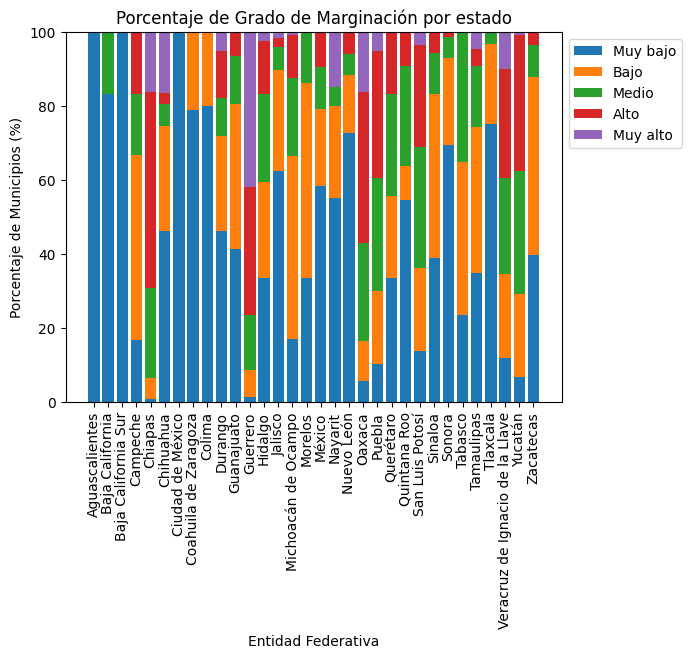

In [124]:
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = Marginacion_Estados[[grado + ' (%)' for grado in marginacion_orden]].values.T

# Se crea las barras apiladas
bottom = [0] * len(Marginacion_Estados.index)
for i in range(len(marginacion_orden)):
    ax.bar(Marginacion_Estados.index, porcentajes[i], bottom=bottom, label=marginacion_orden[i])
    bottom += porcentajes[i]

ax.set_xlabel('Entidad Federativa')
plt.xticks(rotation=90)

ax.set_ylabel('Porcentaje de Municipios (%)')
ax.set_ylim(0, 100)

ax.set_title('Porcentaje de Grado de Marginación por estado')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('porcentaje_marginacion_estado.png', bbox_inches='tight')
plt.show()


In [125]:
Marginacion_Estados_poblacion = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='POB_TOT', aggfunc='sum')
marginacion_orden = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
Marginacion_Estados_poblacion = Marginacion_Estados_poblacion[marginacion_orden]
Marginacion_Estados_poblacion['Total Municipios'] = Marginacion_Estados_poblacion.sum(axis=1)
Marginacion_Estados_poblacion.fillna(0, inplace=True)
Marginacion_Estados_poblacion

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto,Total Municipios
NOM_ENT,,,,,,
Aguascalientes,1425607.0,0.0,0.0,0.0,0.0,1425607.0
Baja California,3651452.0,0.0,117568.0,0.0,0.0,3769020.0
Baja California Sur,798447.0,0.0,0.0,0.0,0.0,798447.0
Campeche,542922.0,255991.0,50823.0,78627.0,0.0,928363.0
Chiapas,604147.0,998167.0,1177464.0,1720632.0,1043418.0,5543828.0
Chihuahua,3410282.0,102330.0,20091.0,26108.0,183058.0,3741869.0
Ciudad de México,9209944.0,0.0,0.0,0.0,0.0,9209944.0
Coahuila de Zaragoza,3096015.0,50756.0,0.0,0.0,0.0,3146771.0
Colima,698142.0,33249.0,0.0,0.0,0.0,731391.0


In [126]:
# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    Marginacion_Estados_poblacion[grado + ' (%)'] = Marginacion_Estados_poblacion[grado] / Marginacion_Estados_poblacion['Total Municipios'] * 100

Marginacion_Estados_poblacion[[grado + ' (%)' for grado in marginacion_orden]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,96.880675,0.000000,3.119325,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,58.481650,27.574451,5.474475,8.469424,0.000000
Chiapas,10.897651,18.005014,21.239187,31.036894,18.821255
Chihuahua,91.138466,2.734730,0.536924,0.697726,4.892154
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,98.387045,1.612955,0.000000,0.000000,0.000000
Colima,95.454005,4.545995,0.000000,0.000000,0.000000


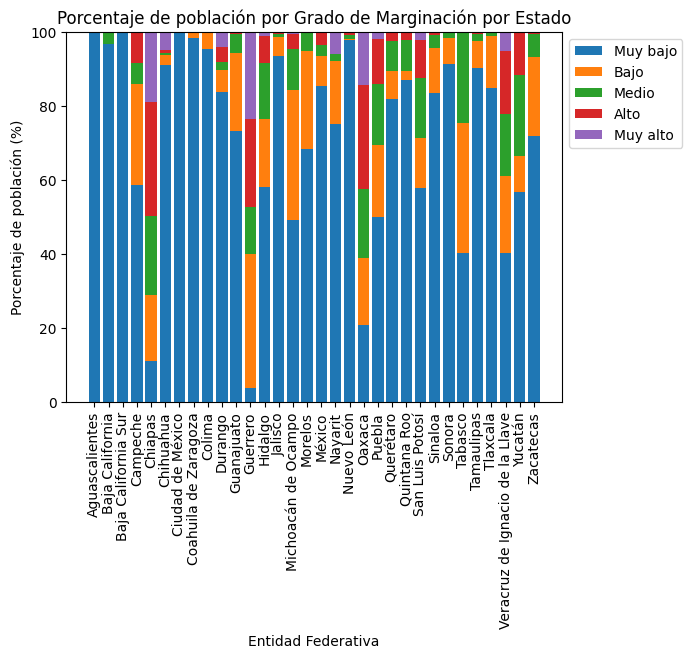

In [127]:
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = Marginacion_Estados_poblacion[[grado + ' (%)' for grado in marginacion_orden]].values.T

# Se crea las barras apiladas
bottom = [0] * len(Marginacion_Estados_poblacion.index)
for i in range(len(marginacion_orden)):
    ax.bar(Marginacion_Estados_poblacion.index, porcentajes[i], bottom=bottom, label=marginacion_orden[i])
    bottom += porcentajes[i]

ax.set_xlabel('Entidad Federativa')
plt.xticks(rotation=90)

ax.set_ylabel('Porcentaje de población (%)')
ax.set_ylim(0, 100)

ax.set_title('Porcentaje de población por Grado de Marginación por Estado')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('porcentaje_marginacion_estado_poblacion.png', bbox_inches='tight')
plt.show()

Las gráficas comparadas

<div style="display:flex; justify-content:space-between; margin: 0 auto;">
    <div>
        <img src="porcentaje_marginacion_estado_poblacion.png" width="400">
    </div>
    <div>
        <img src="porcentaje_marginacion_estado.png" width="400">
    </div>
</div>

